# **Project Title:**
## **Fruits Quality Inspection system**


In [ ]:
from google.colab import drive

# Mount Google Drive
#drive.mount('/content/drive')

# Path to the zip file in Google Drive
#zip_file_path = '/content/drive/MyDrive/path/to/Dataset.zip'



In [ ]:
!ls '/content/drive/MyDrive/FYP object detection Dataset/Dataset.zip'

'/content/drive/MyDrive/FYP object detection Dataset/Dataset.zip'
'/content/drive/MyDrive/FYP object detection Dataset/Dataset.zip'


In [ ]:
!7z x "/content/drive/MyDrive/FYP object detection Dataset/Dataset.zip"



7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/FYP object detection Dataset/                                                              1 file, 48147636 bytes (46 MiB)

Extracting archive: /content/drive/MyDrive/FYP object detection Dataset/Dataset.zip
 61% 4096 Open              --
Path = /content/drive/MyDrive/FYP object detection Dataset/Dataset.zip
Type = zip
Physical Size = 48147636

  0%     21% 1031 - train/images/IMG202007281300 . f936626b9deda0edeecb3df71.jpg                                                                        

In [ ]:
Train_set_images='/content/test/images'
test_set='/content/test'
valid_set='/content/valid'

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/107.7 GB disk)


In [ ]:
# Git clone method (for development)

%cd {HOME}
!git clone github.com/ultralytics/ultralytics
%cd {HOME}/ultralytics
!pip install -e .

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


## **Check the shape of images**

In [ ]:
import cv2

image_path = "/content/train/images/20190809_115459_jpg.rf.6e1df96fbc32d039434cfba3efd776d7.jpg"
image = cv2.imread(image_path)
if image is not None:
    height, width, channels = image.shape
    print("Image dimensions - Height: {}, Width: {}, Channels: {}".format(height, width, channels))
else:
    print("Error reading the image.")

Image dimensions - Height: 320, Width: 320, Channels: 3


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/train/images/20190809_115439_jpg.rf.abe7d2c9ff8b3f3cc1deab4a5664ace0.jpg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 82.9MB/s]

2024-02-02 16:15:49.844209: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-02 16:15:49.844267: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-02 16:15:49.845593: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-02 16:15:50.873367: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
WARNING ⚠️ NMS time li

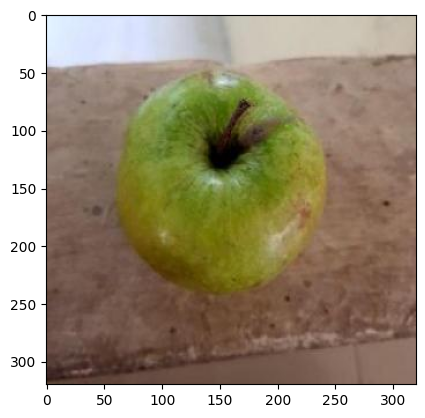

In [ ]:
import matplotlib.pyplot as plt

from PIL import Image

image_path = "/content/train/images/20190809_115451_jpg.rf.77d682ffd085a616a8a82b113ee2abfc.jpg"
img = Image.open(image_path)
plt.imshow(img)


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="c2VmkPyw3tV8egvbtta0")
project = rf.workspace("university-n4tcp").project("fruits-quality-prediction")
dataset = project.version(3).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`


In [ ]:
## Custom Training
%cd {HOME}

/content


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=1024 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 98.4MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Fruits-Quality-Prediction-3/data.yaml, epochs=25, patience=50, batch=16, imgsz=1024, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/content


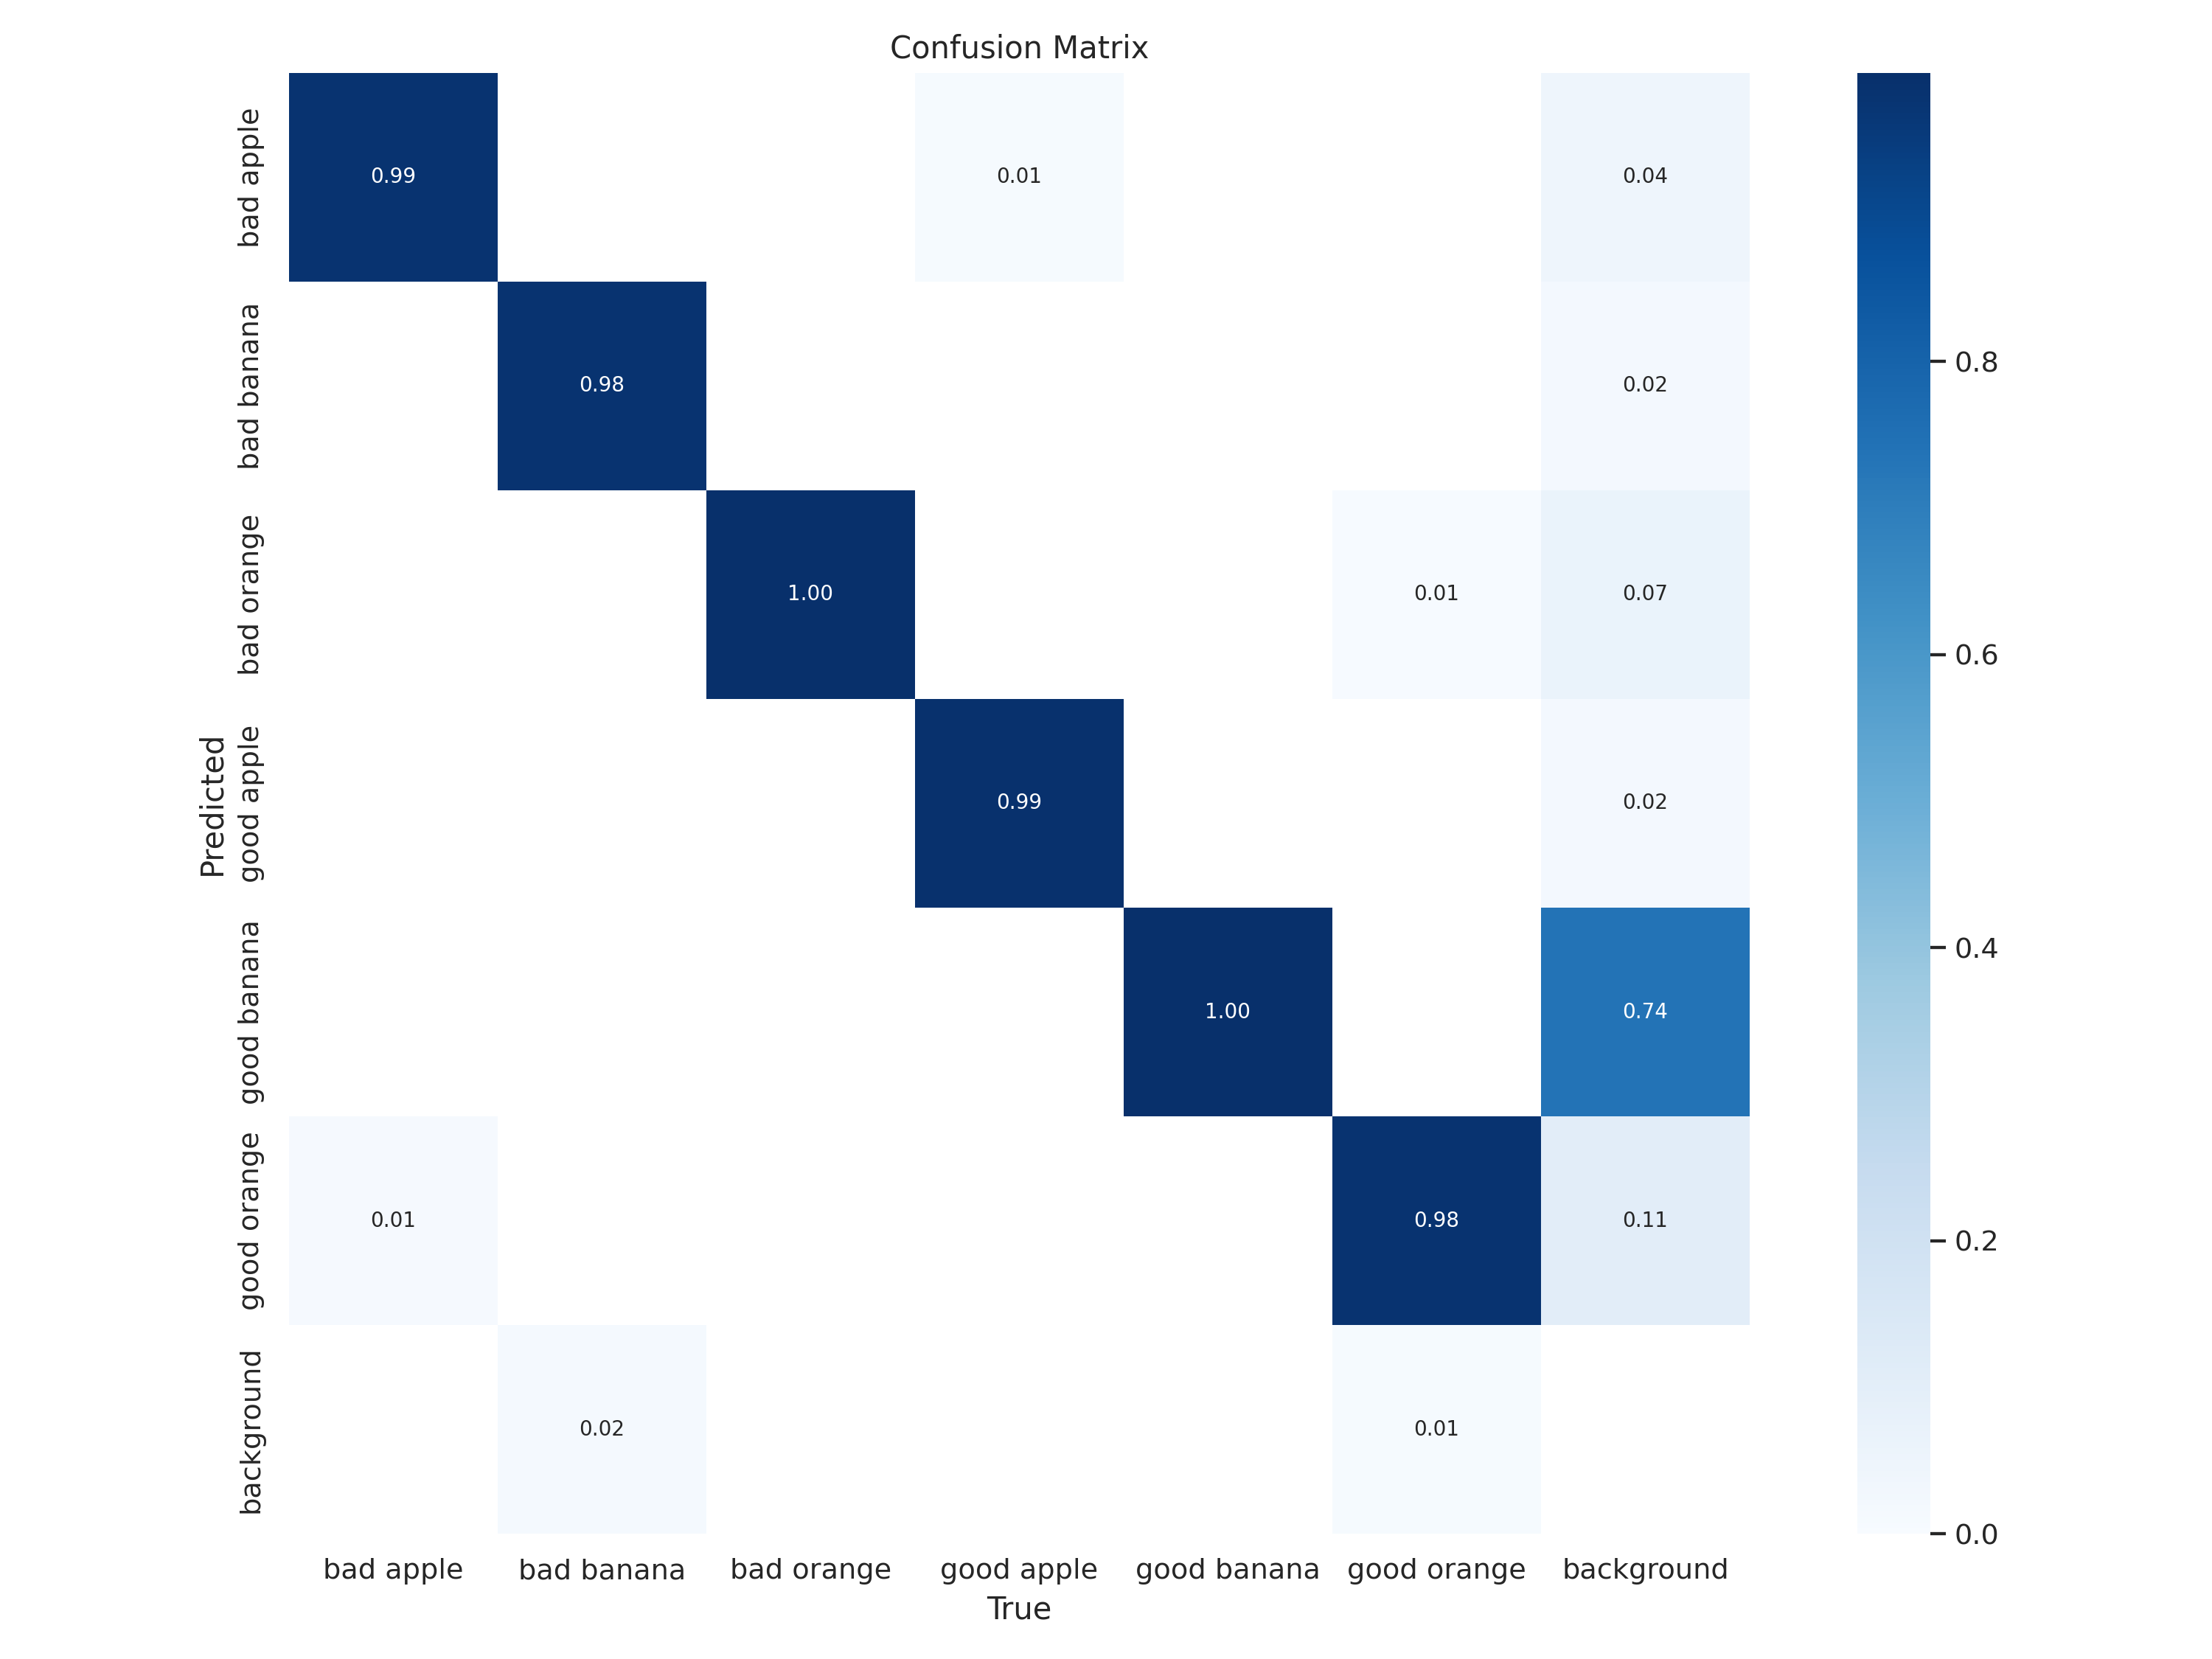

In [ ]:
%cd {HOME}
%matplotlib inline
from IPython.display import Image

# Assuming HOME is the correct path
image_path = f'{HOME}/runs/detect/train/confusion_matrix.png'
Image(filename=image_path, width=800)


/content


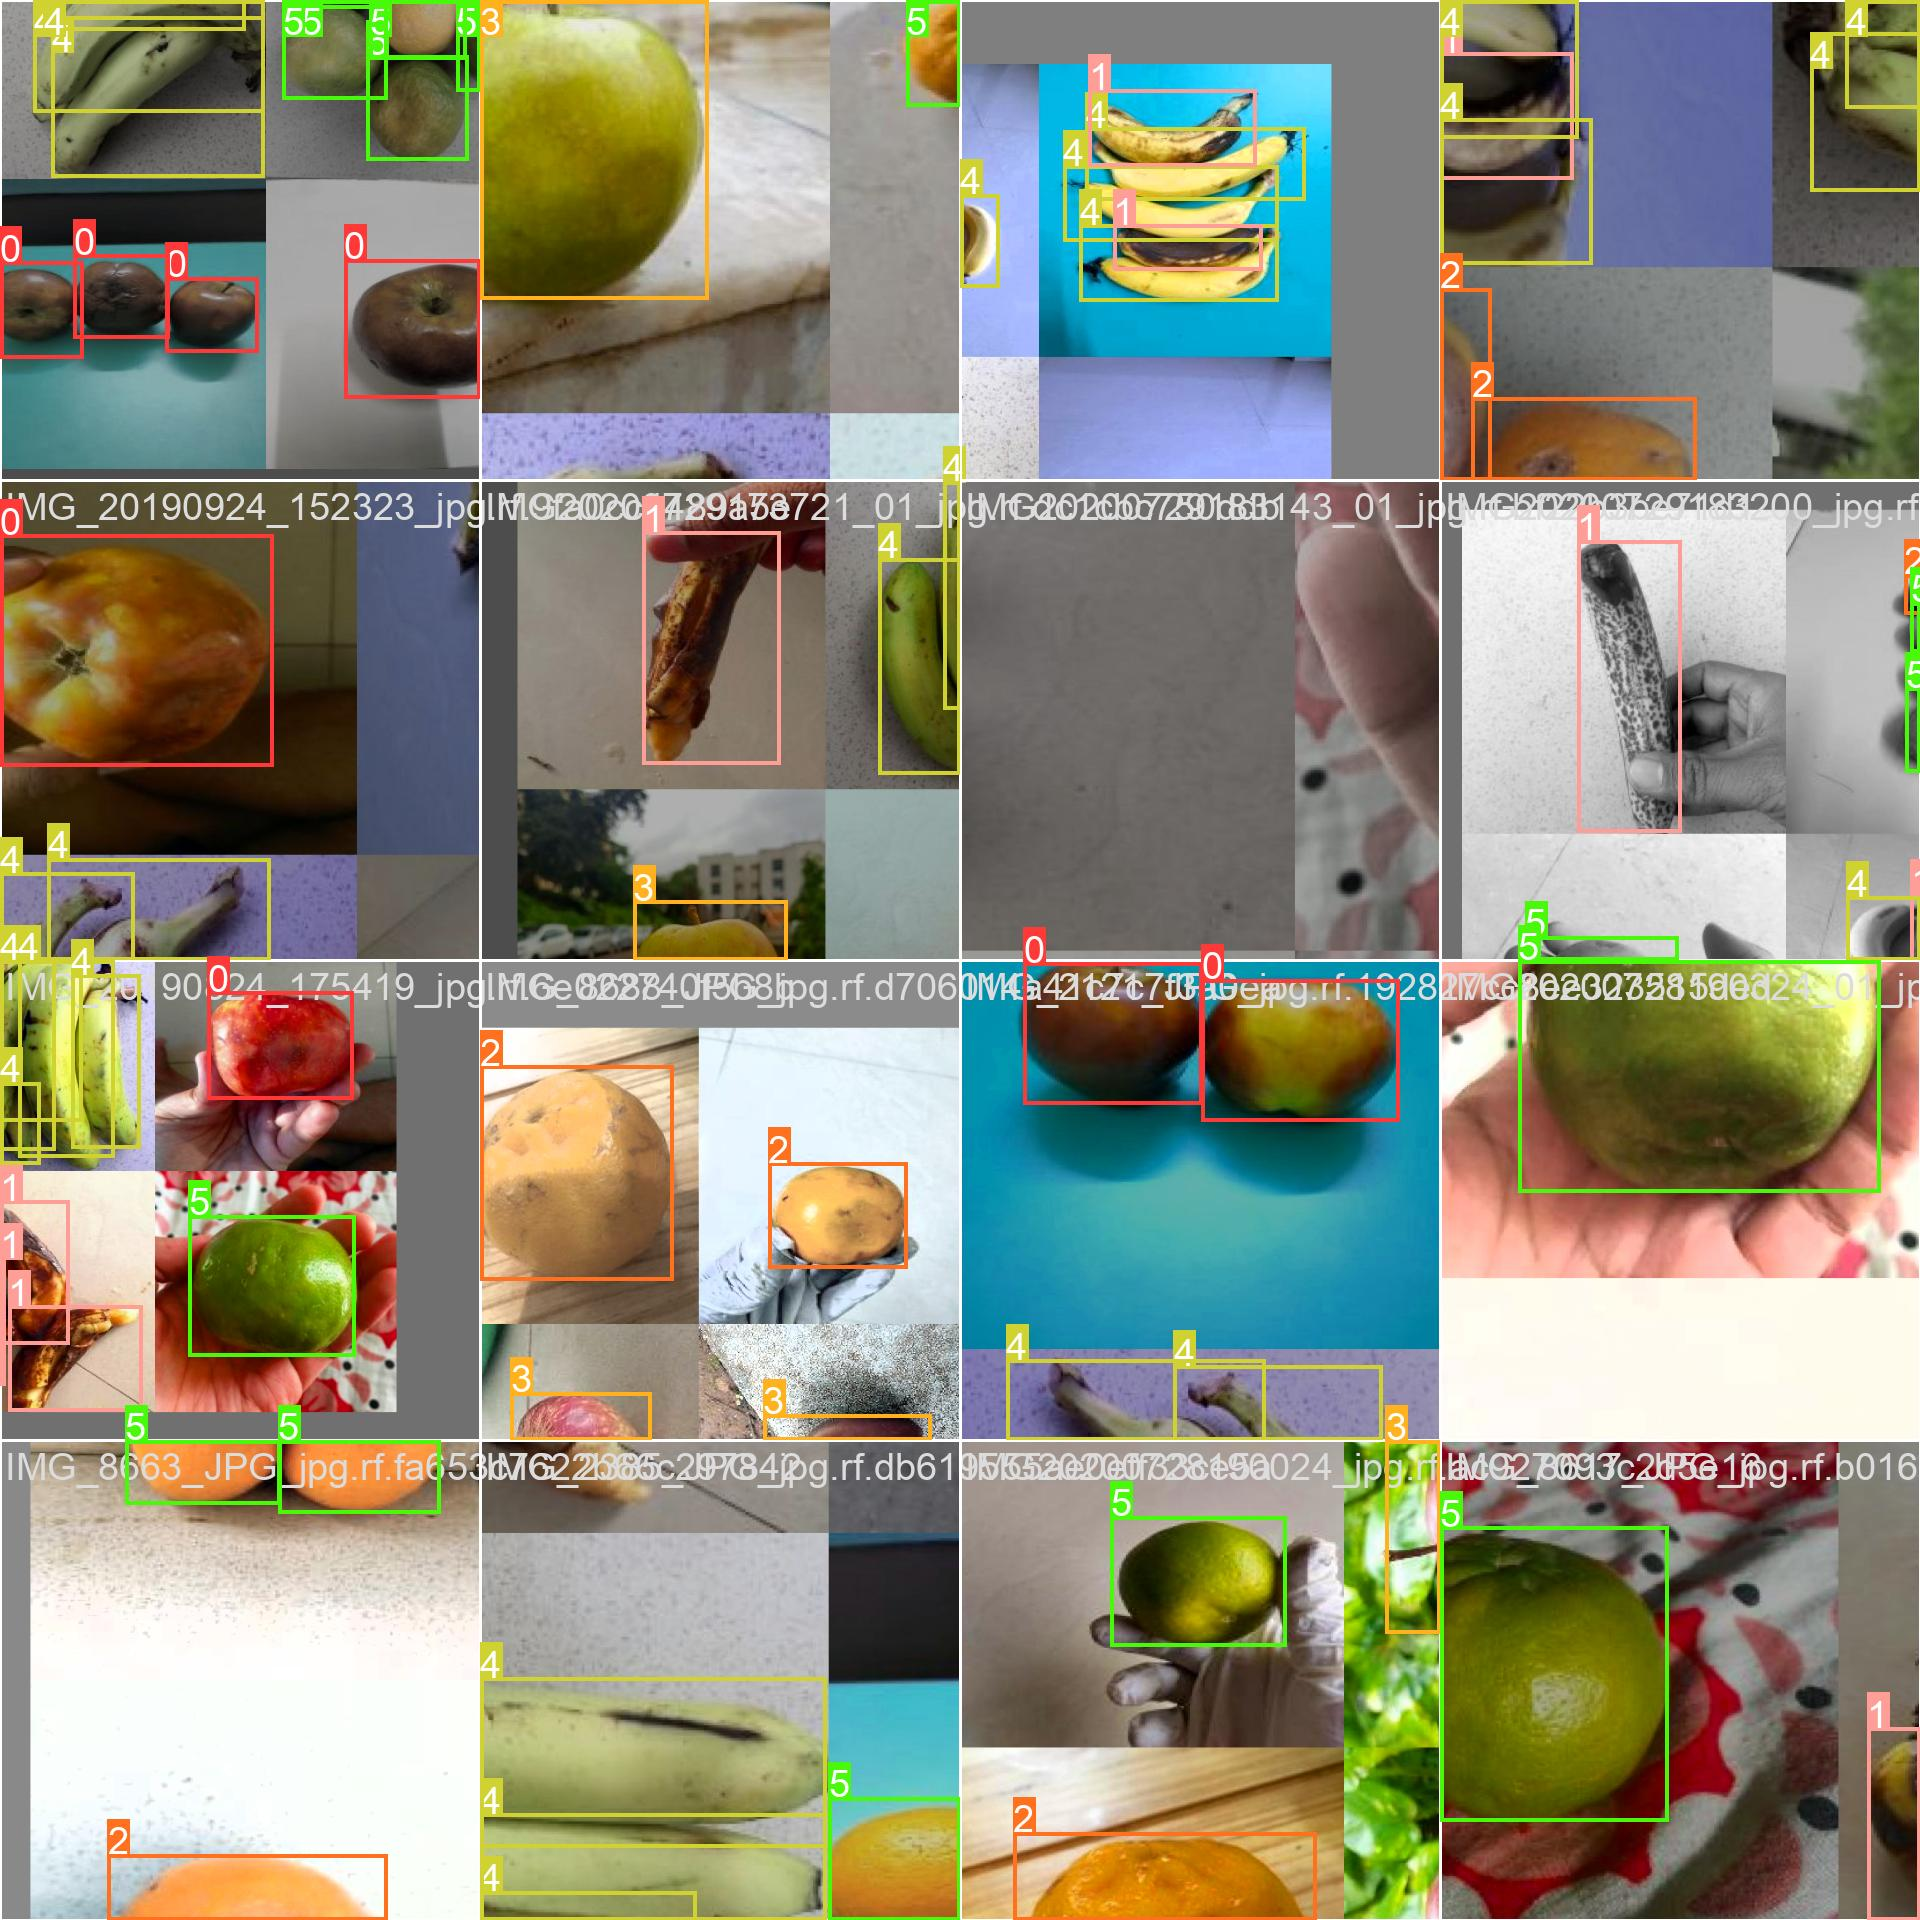

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch1.jpg', width=800)

/content


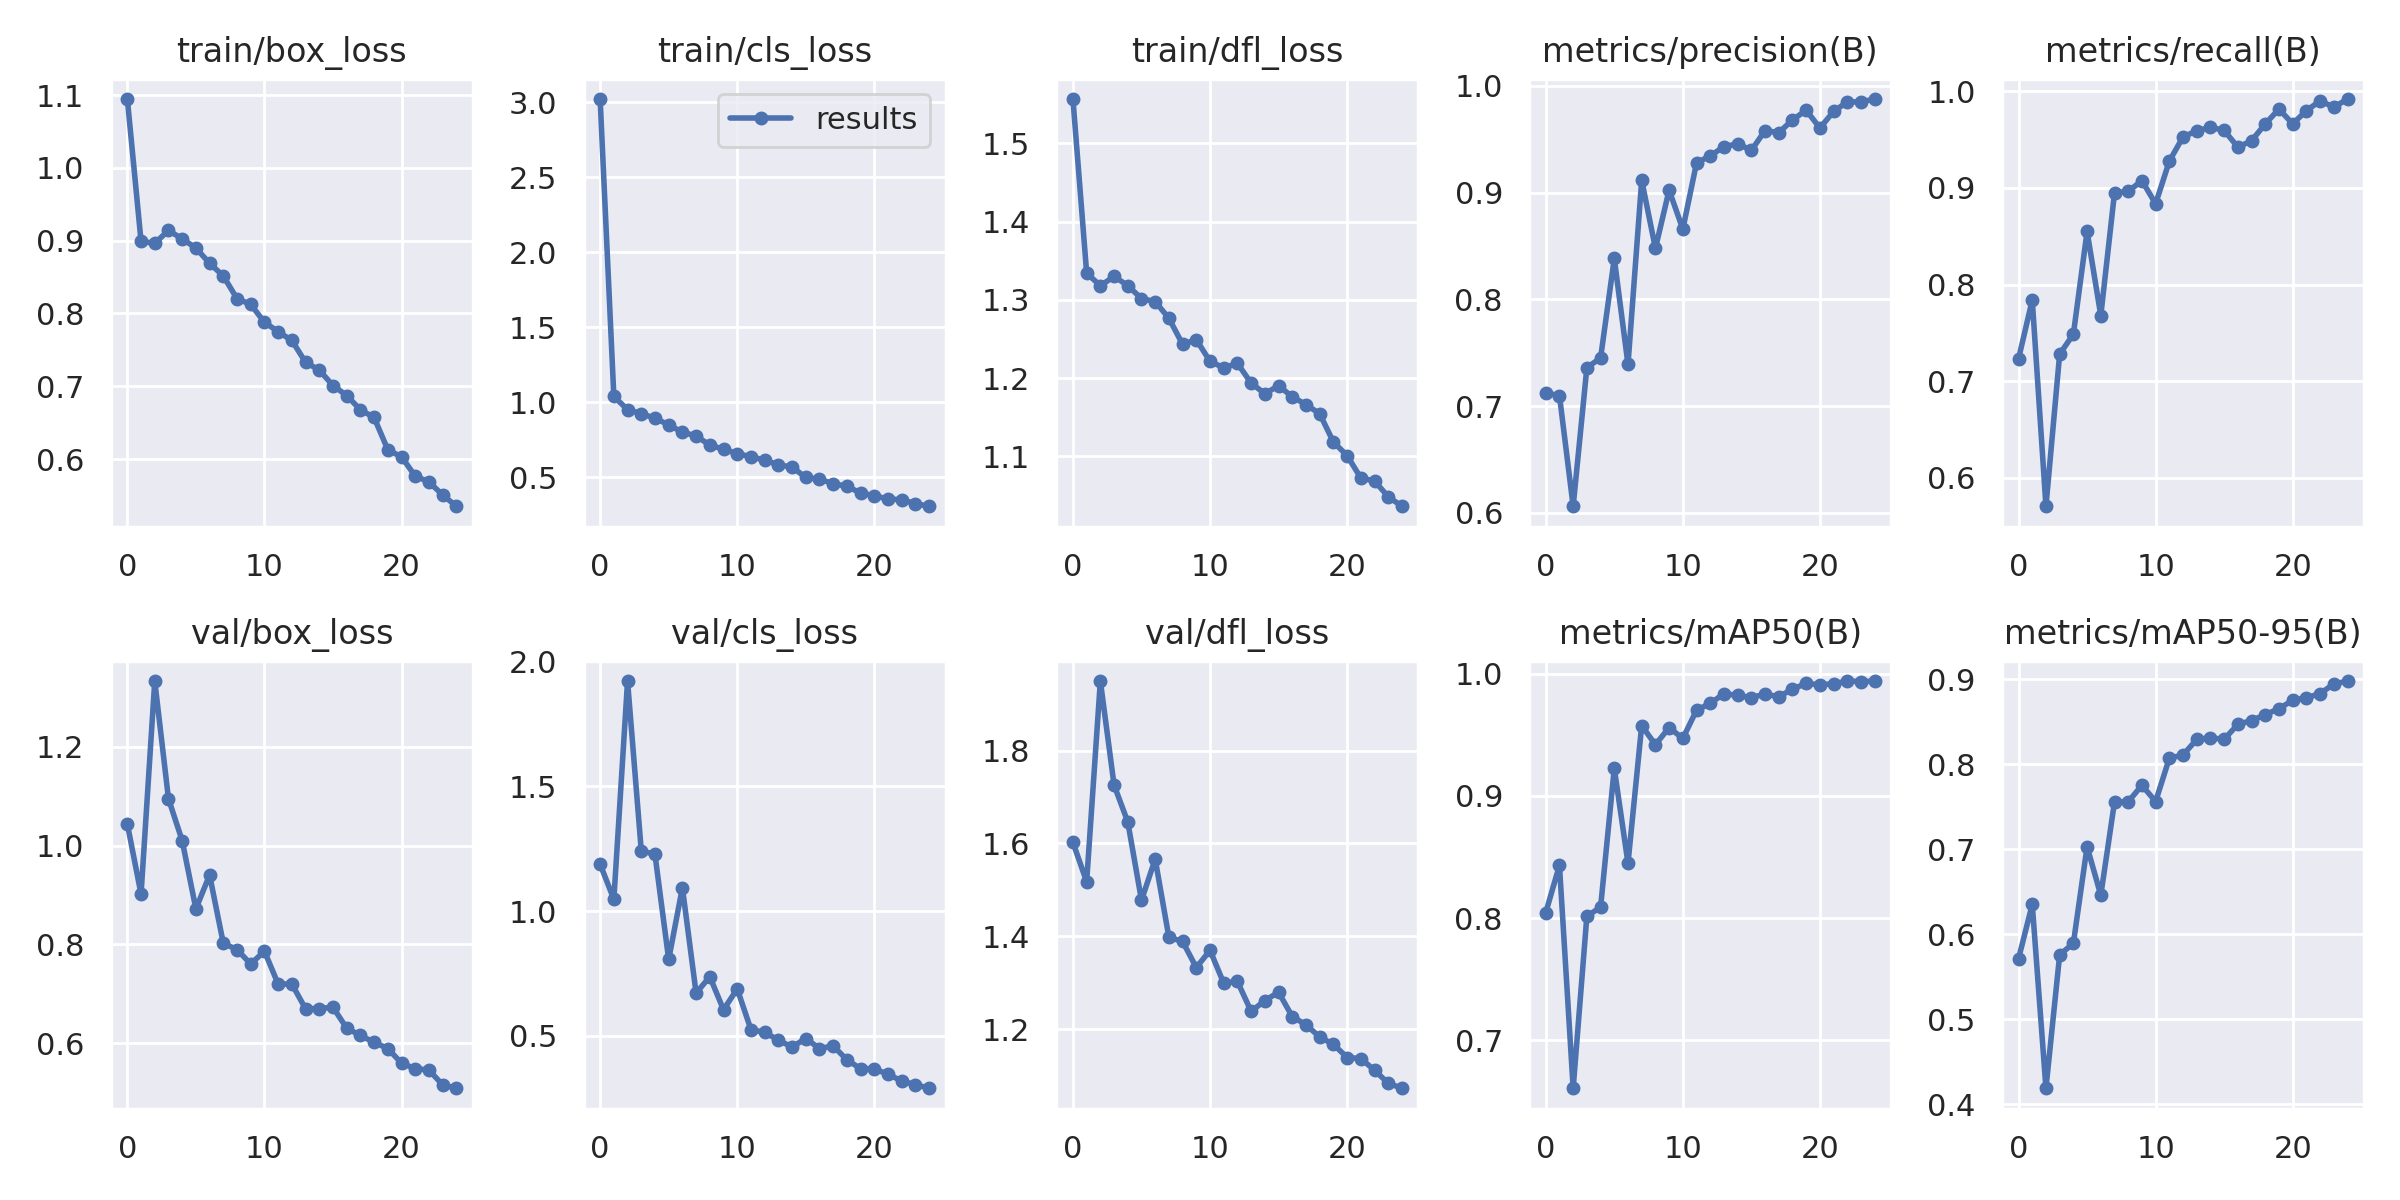

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=800)

/content


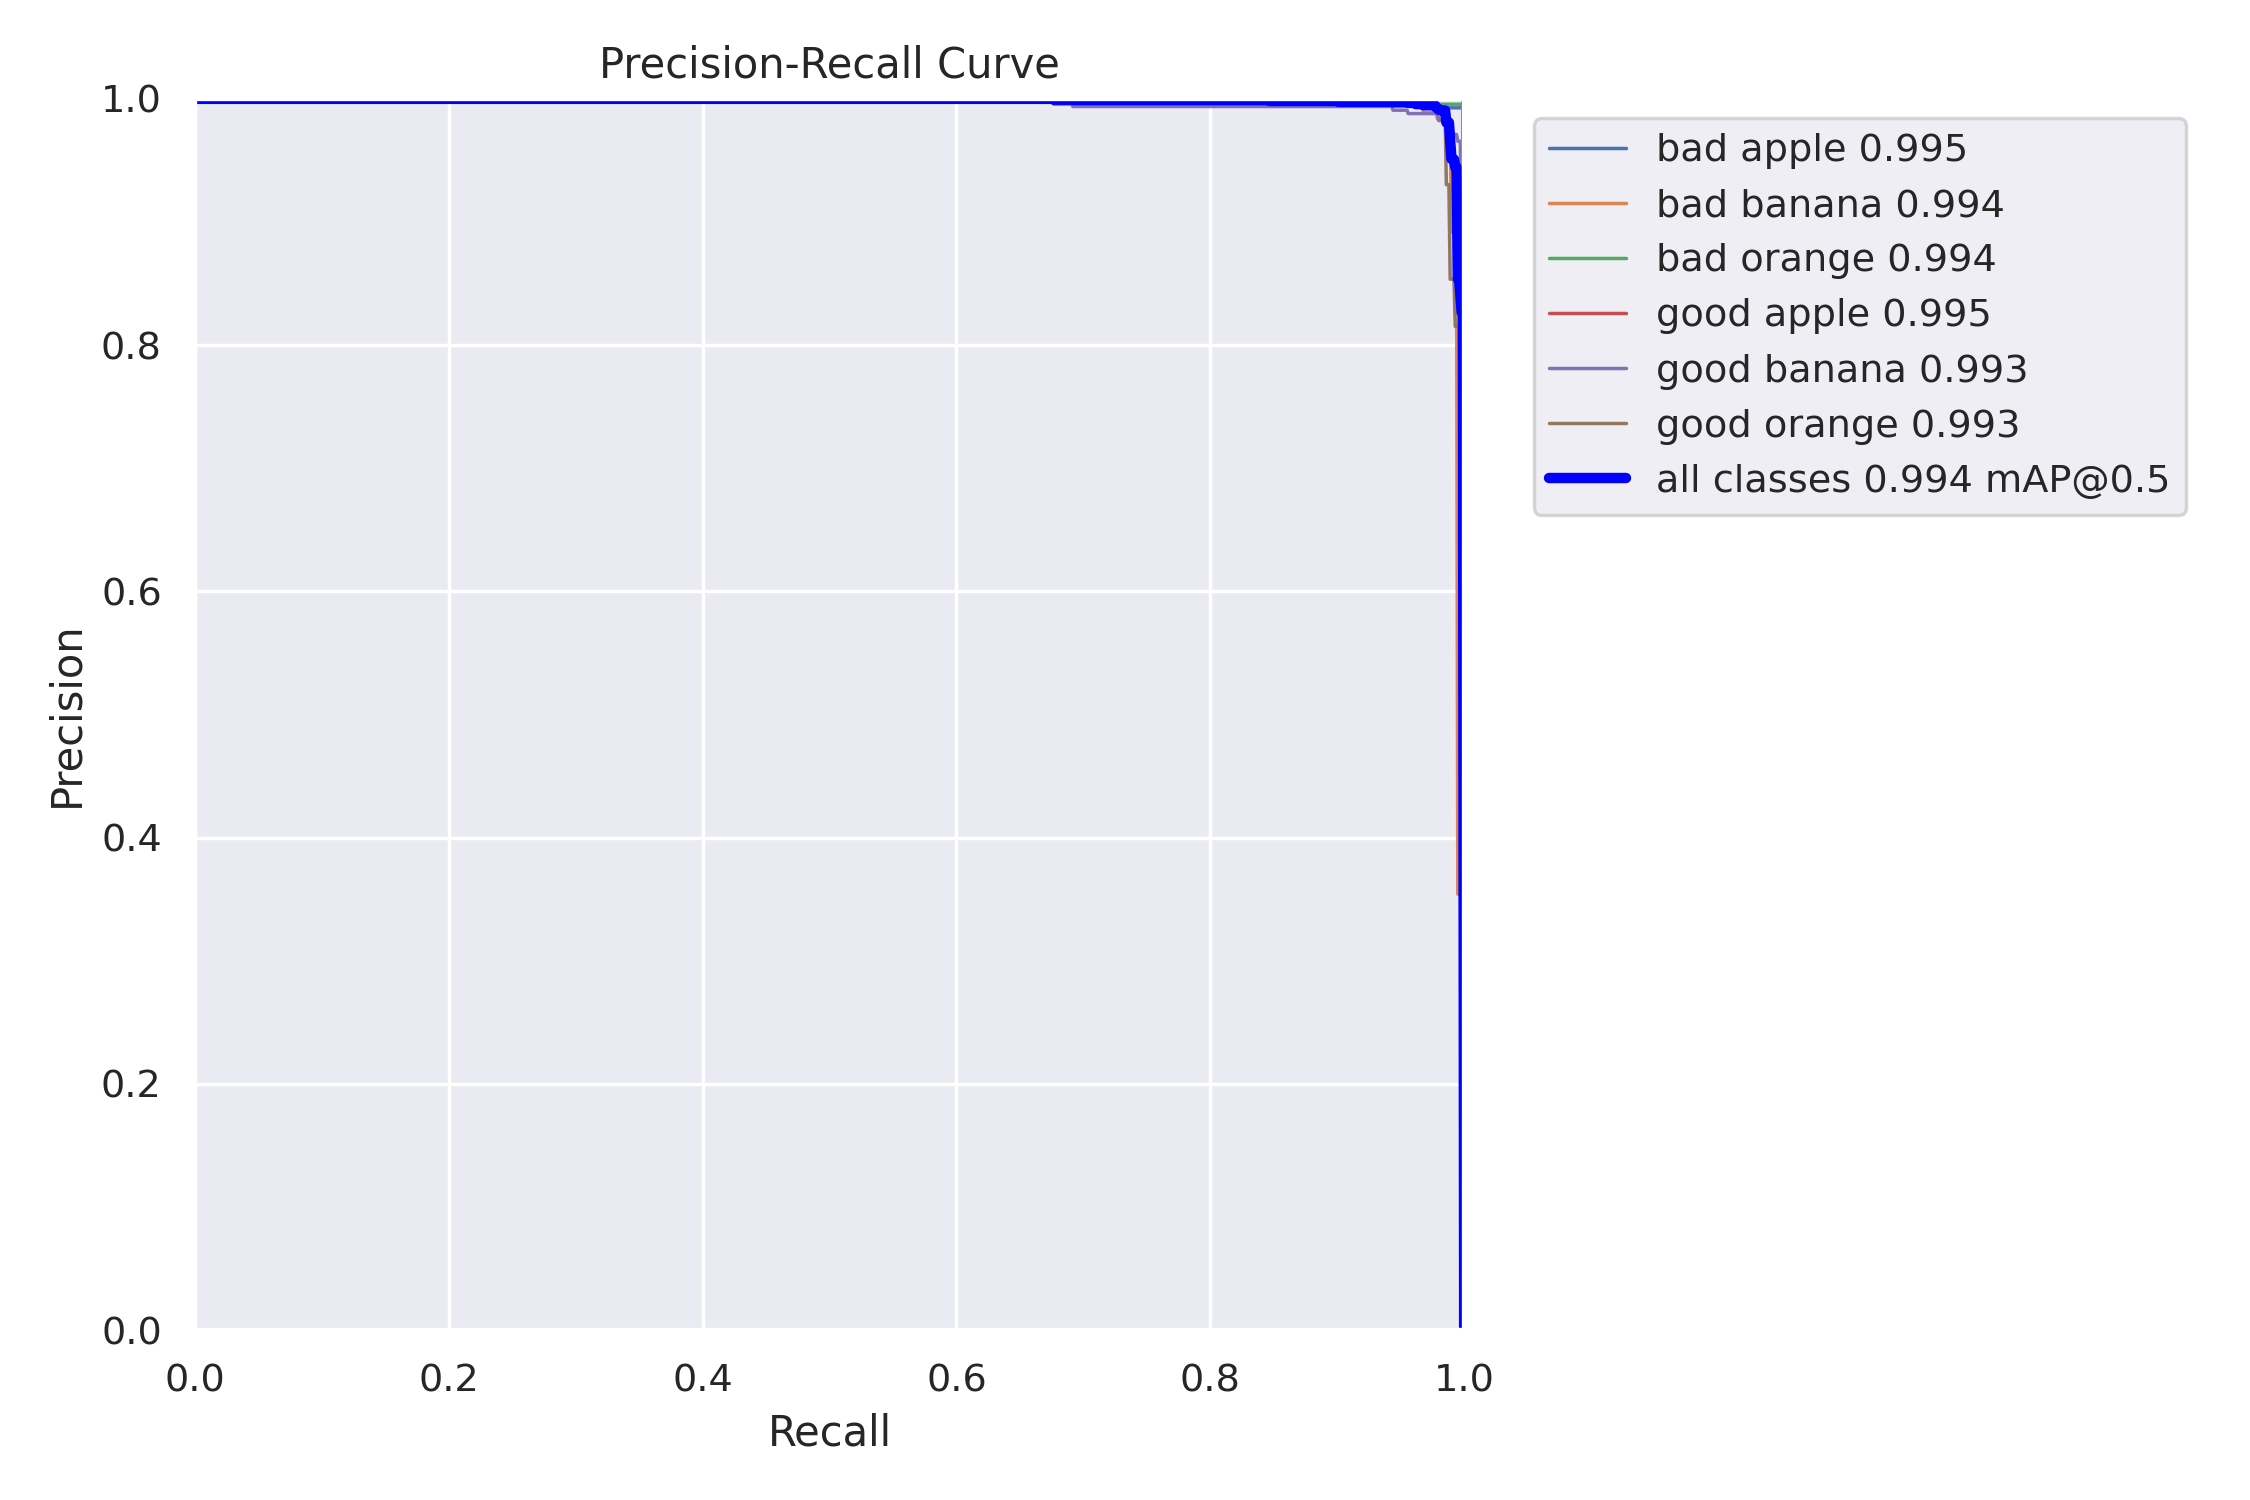

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=600)

/content


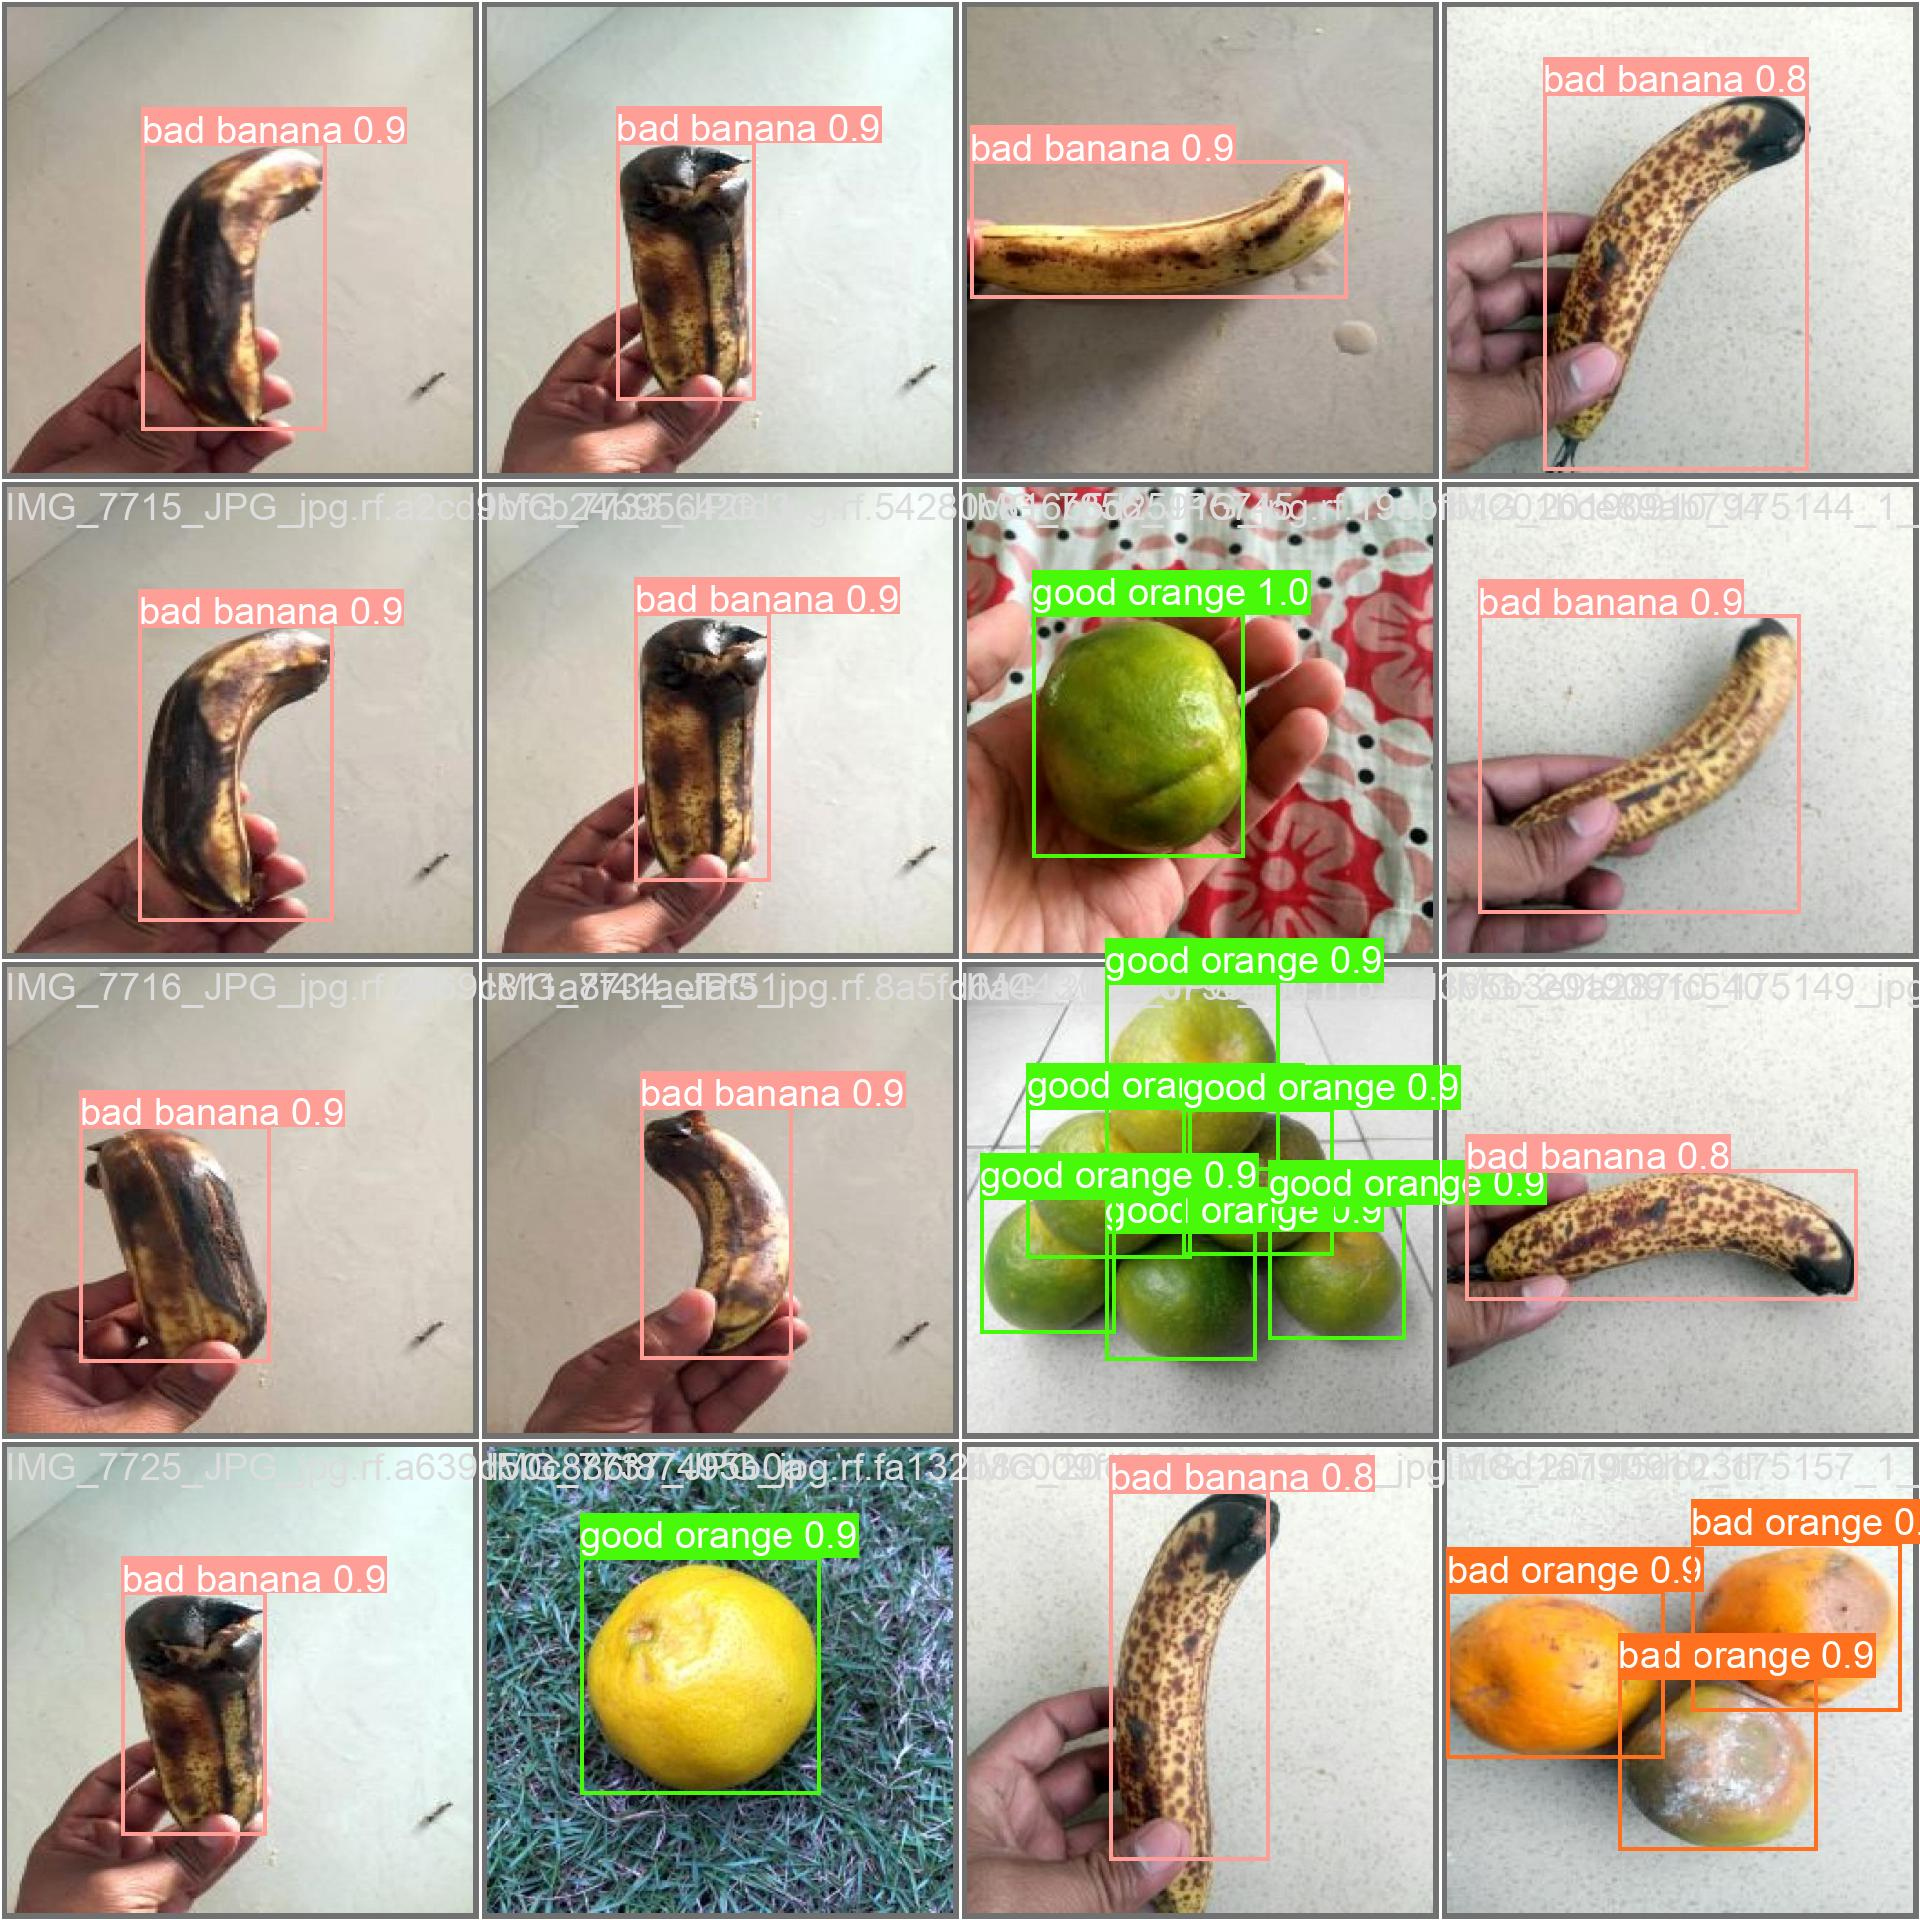

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch2_pred.jpg', width=800)

/content


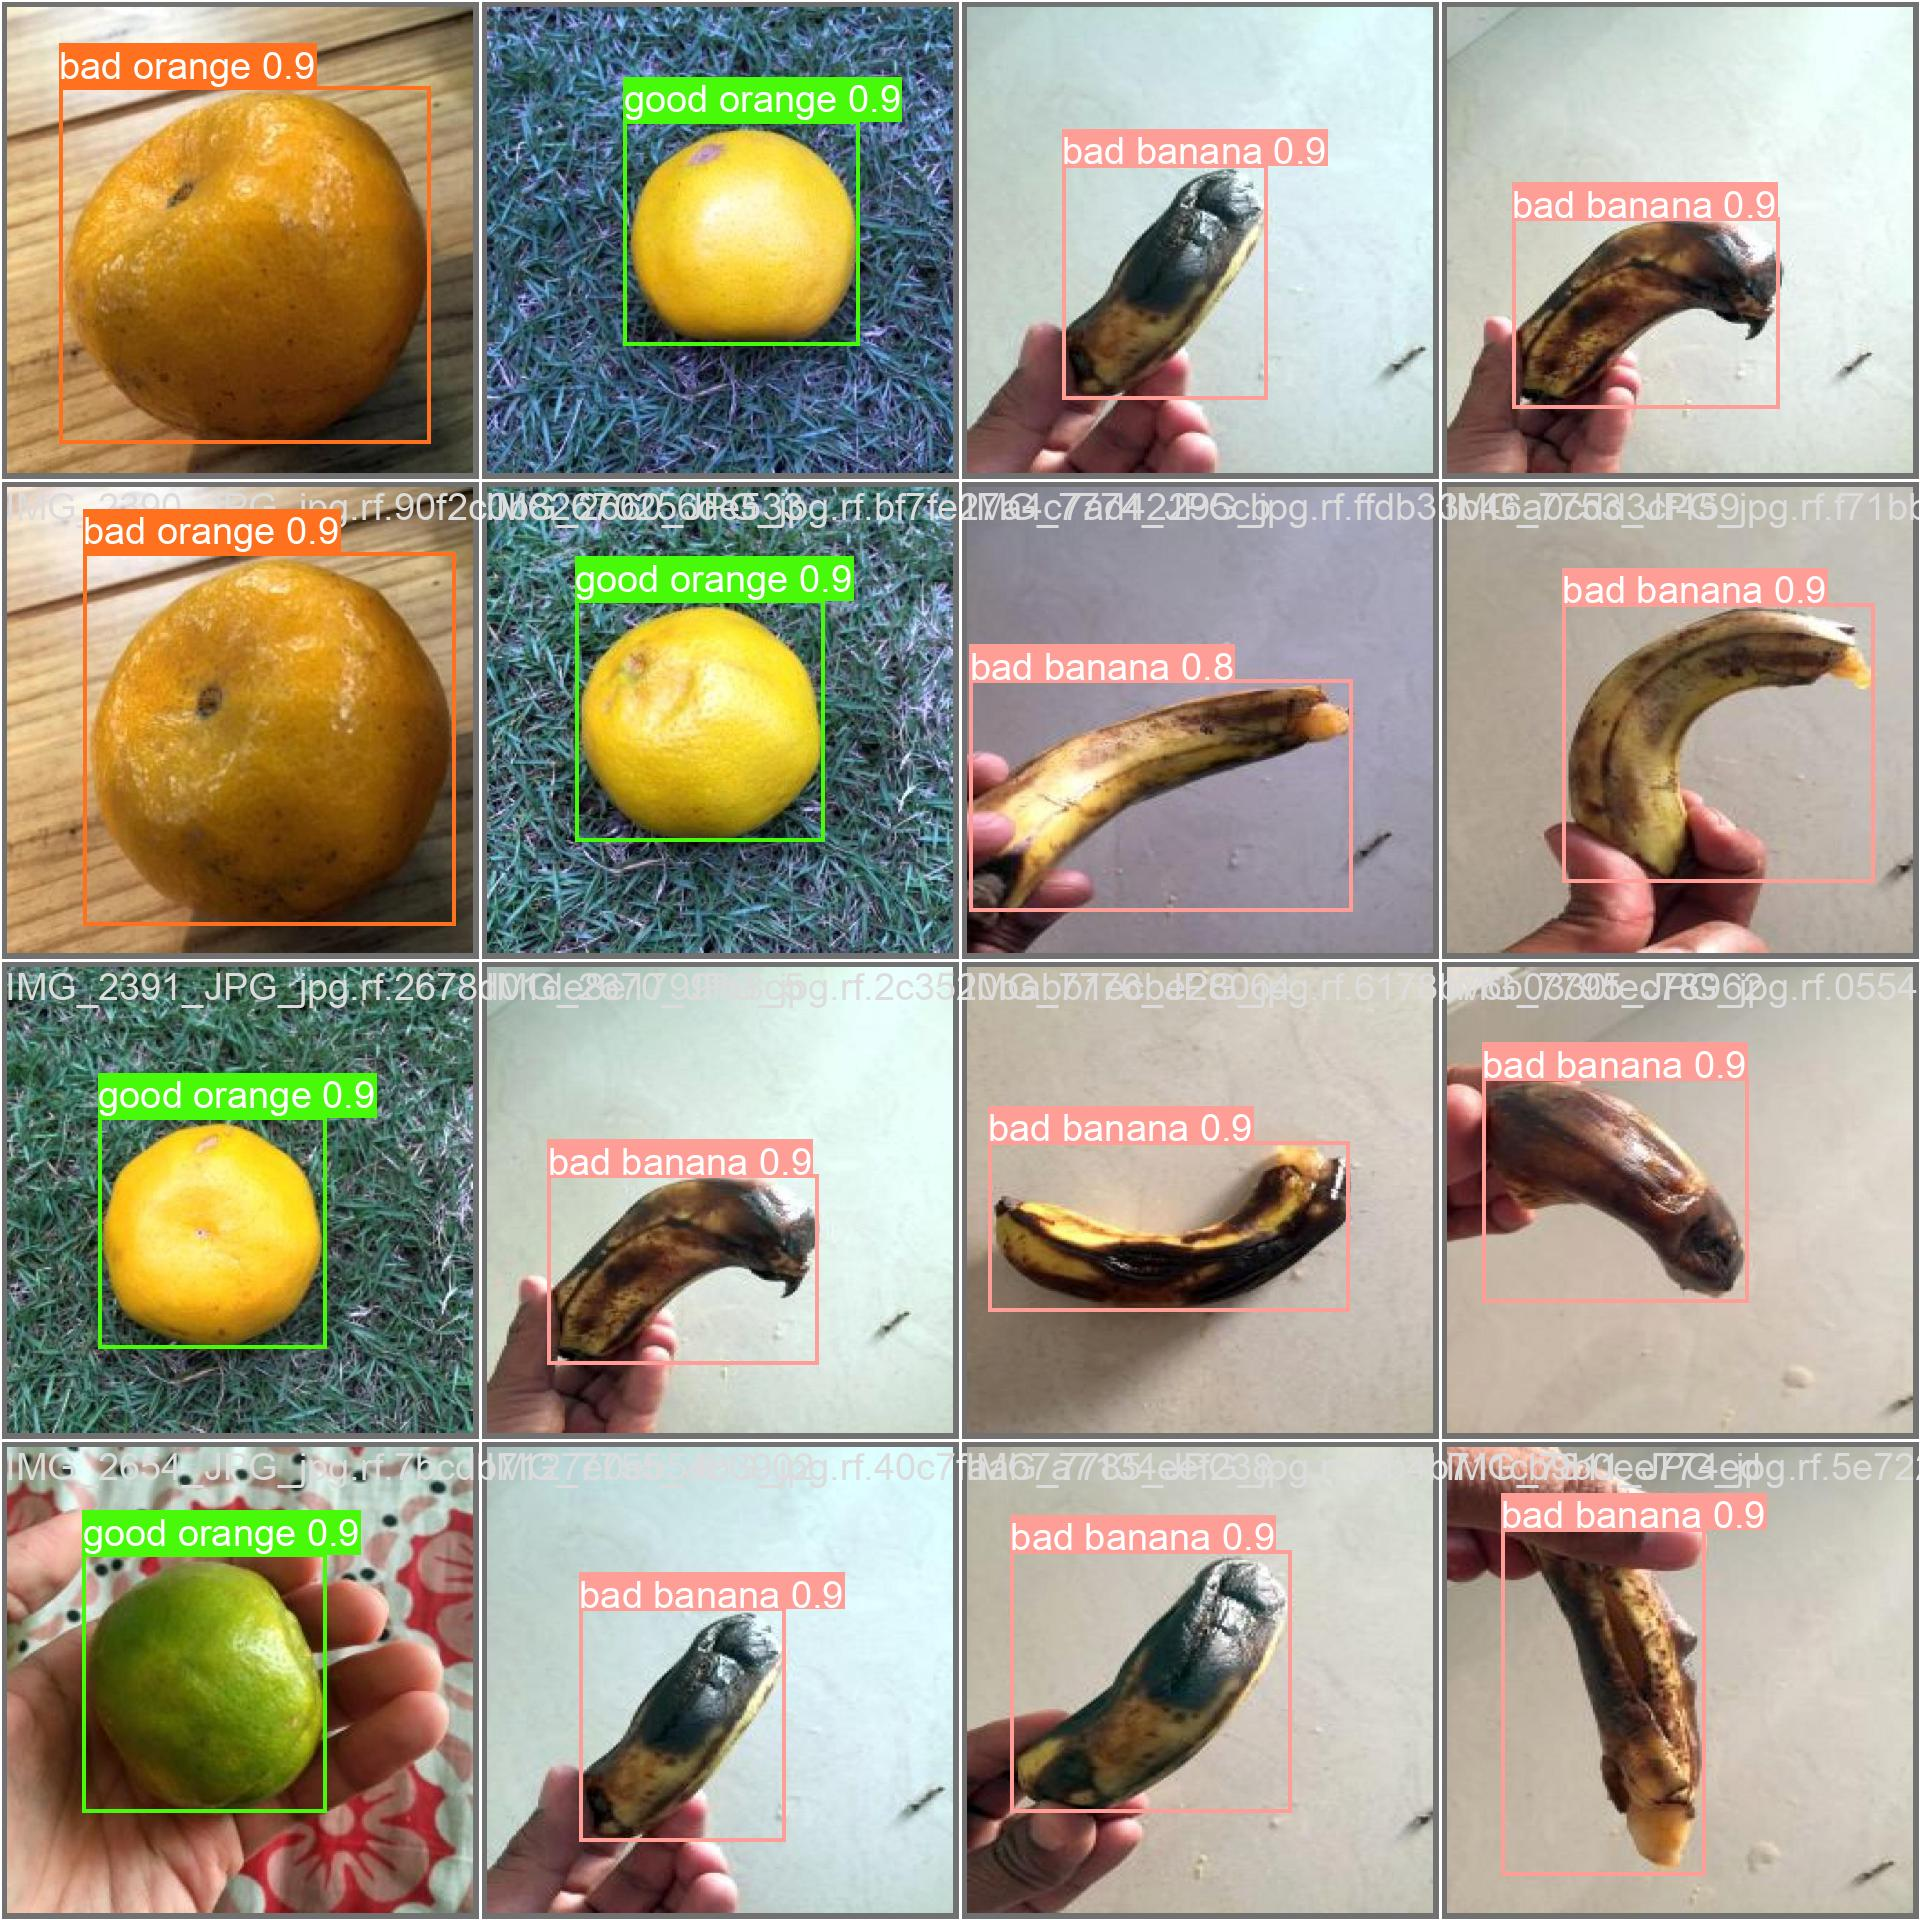

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=800)

# **Validate Custom Model**

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2024-01-27 19:20:33.996702: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-27 19:20:33.996756: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-27 19:20:33.998091: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-27 19:20:35.080754: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Fruits-Quality-Prediction-3/vali

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2024-01-27 19:22:44.618566: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-27 19:22:44.618617: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-27 19:22:44.619926: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-27 19:22:45.682409: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
image 1/279 /content/datasets/Fruits-Quality-Prediction-3/test/i

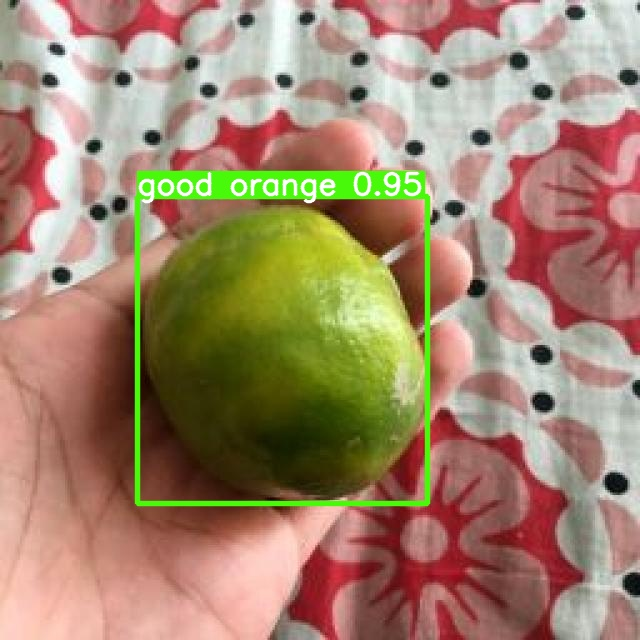

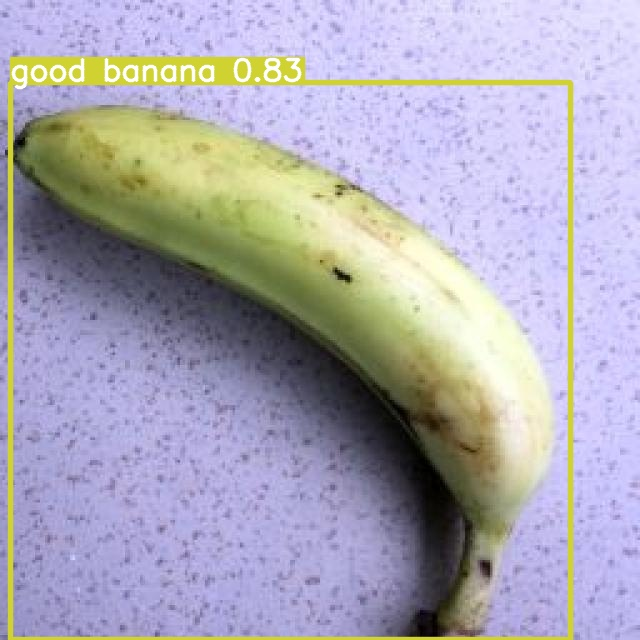

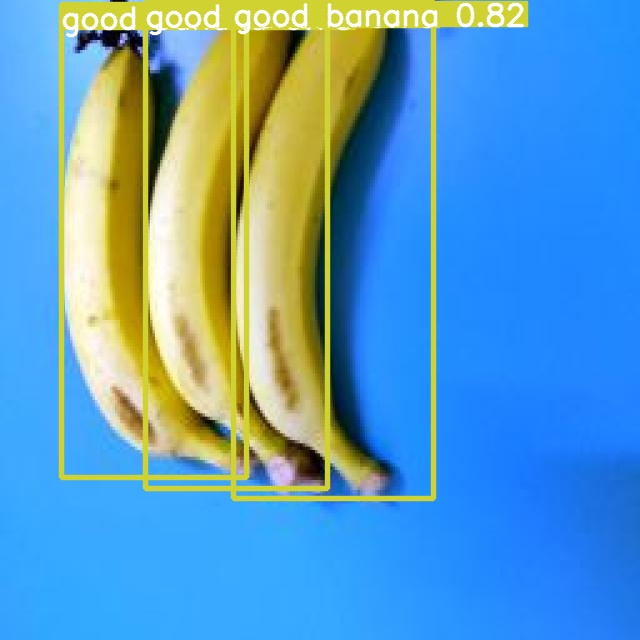

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

/content


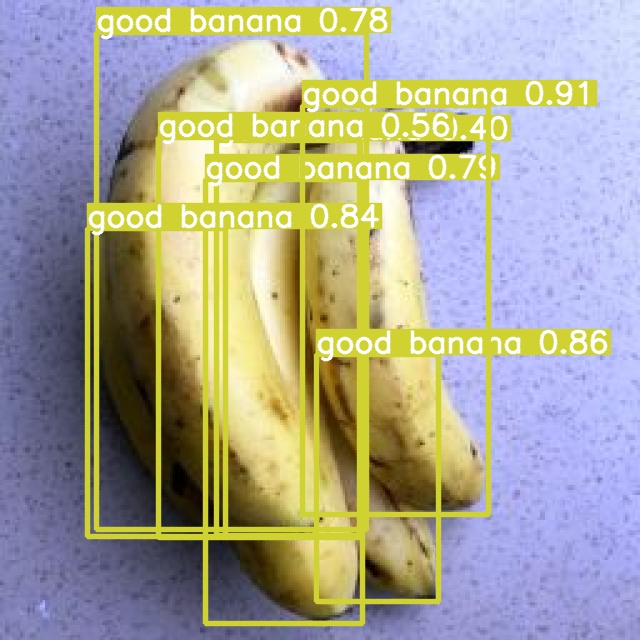

In [ ]:
%cd {HOME}
Image(filename='/content/runs/detect/predict2/IMG_8817_JPG_jpg.rf.bceec829eba53d90d90f5570ba7c0eb6.jpg', height=600)

/content


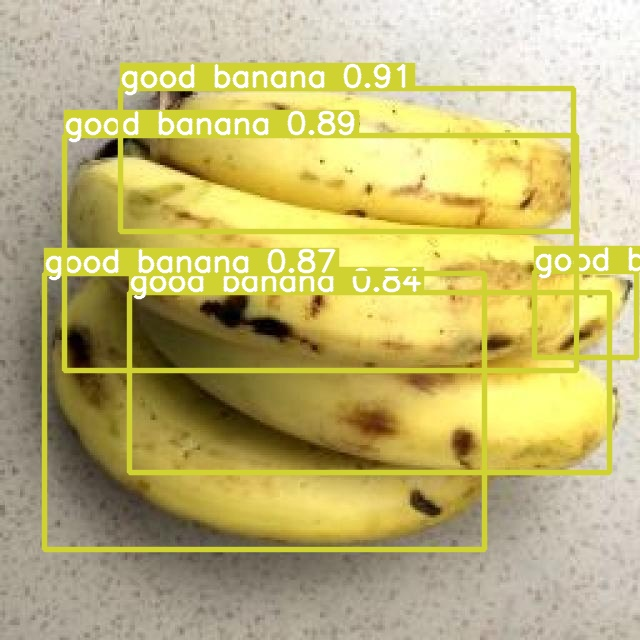

In [ ]:
%cd {HOME}
Image(filename='/content/runs/detect/predict2/IMG_8827_JPG_jpg.rf.cf5850e368f6c1f4002200fdf4192089.jpg', height=600)

/content


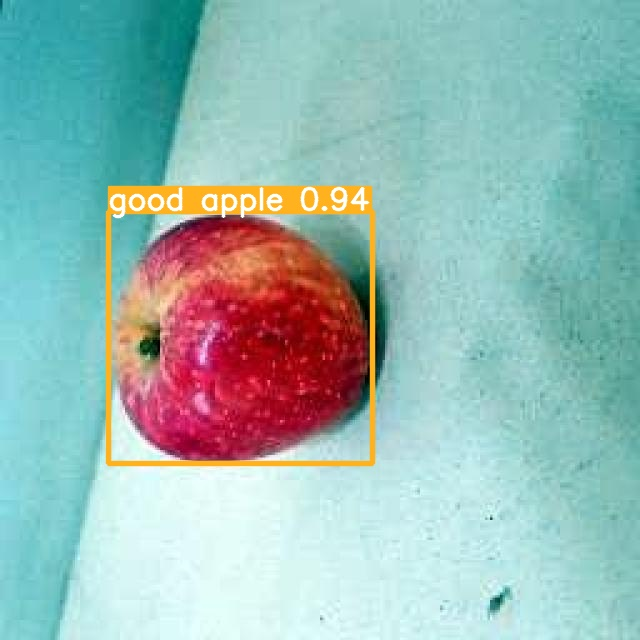

In [ ]:
%cd {HOME}
Image(filename='/content/runs/detect/predict2/20190809_165625_jpg.rf.67b5b589733f6920c54e67f1041471a5.jpg', height=600)

/content


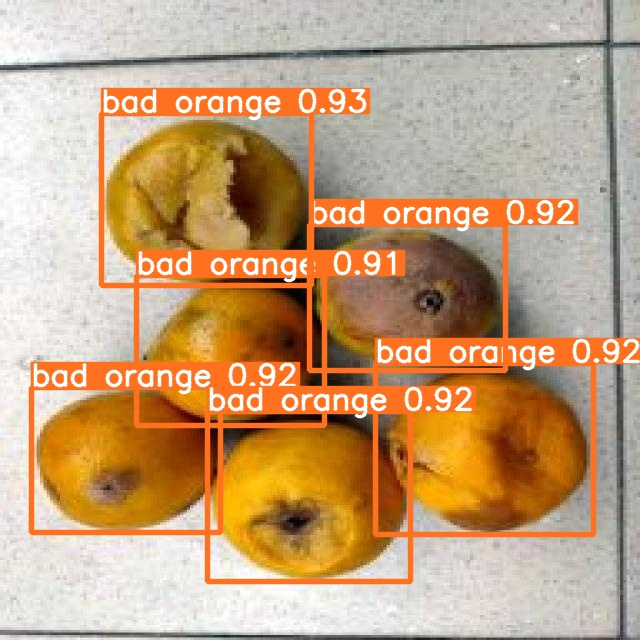

In [ ]:

%cd {HOME}
Image(filename='/content/runs/detect/predict2/IMG20200728140755_jpg.rf.35ae7f1c438399d0b47220611cc6c0d6.jpg', height=600)